# Import Libraries

In [9]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE

# Import Data

In [10]:
# Importing Data from an Excel file
df = pd.read_excel('bandarharjo_fix.xlsx')
df.head()

,No Anak,JK,Tgl Lahir,BB Lahir,TB Lahir,Prov,Kab/Kota,Kec,Pukesmas,Desa/Kel,...,ZS TB/U,BB/TB,ZS BB/TB,Naik Berat Badan,KEK,TIDAK KEK,JML,ANEMIA,TIDAK ANEMIA,JML.1
0,1,P,2024-01-08,2.0,45.0,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,BANDARHARJO,...,-2.50,Gizi Baik,-0.94,N,0,1,1,0,1,1
1,2,P,2019-02-06,2.8,49.0,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.35,Gizi Baik,0.78,N,0,0,0,0,0,0
2,3,L,2019-02-20,2.9,49.0,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.67,Gizi Lebih,2.01,N,0,0,0,0,0,0
3,4,P,2019-02-27,2.8,49.0,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.47,Gizi Baik,-0.97,N,0,0,0,0,0,0
4,5,P,2019-03-04,2.8,49.0,JAWA TENGAH,SEMARANG,SEMARANG UTARA,BANDARHARJO,TANJUNGMAS,...,-1.80,Gizi Lebih,2.15,N,0,0,0,0,0,0


In [11]:
# Displaying the columns in the DataFrame
df.columns

Index(['No Anak', 'JK', 'Tgl Lahir', 'BB Lahir', 'TB Lahir', 'Prov',
       'Kab/Kota', 'Kec', 'Pukesmas', 'Desa/Kel', 'Usia Saat Ukur',
       'Umur Bulan', 'Tanggal Pengukuran', 'Berat', 'Tinggi', 'BB/U',
       'ZS BB/U', 'TB/U', 'ZS TB/U', 'BB/TB', 'ZS BB/TB', 'Naik Berat Badan',
       'KEK', 'TIDAK KEK', 'JML', 'ANEMIA', 'TIDAK ANEMIA', 'JML.1'],
      dtype='object')

# EDA

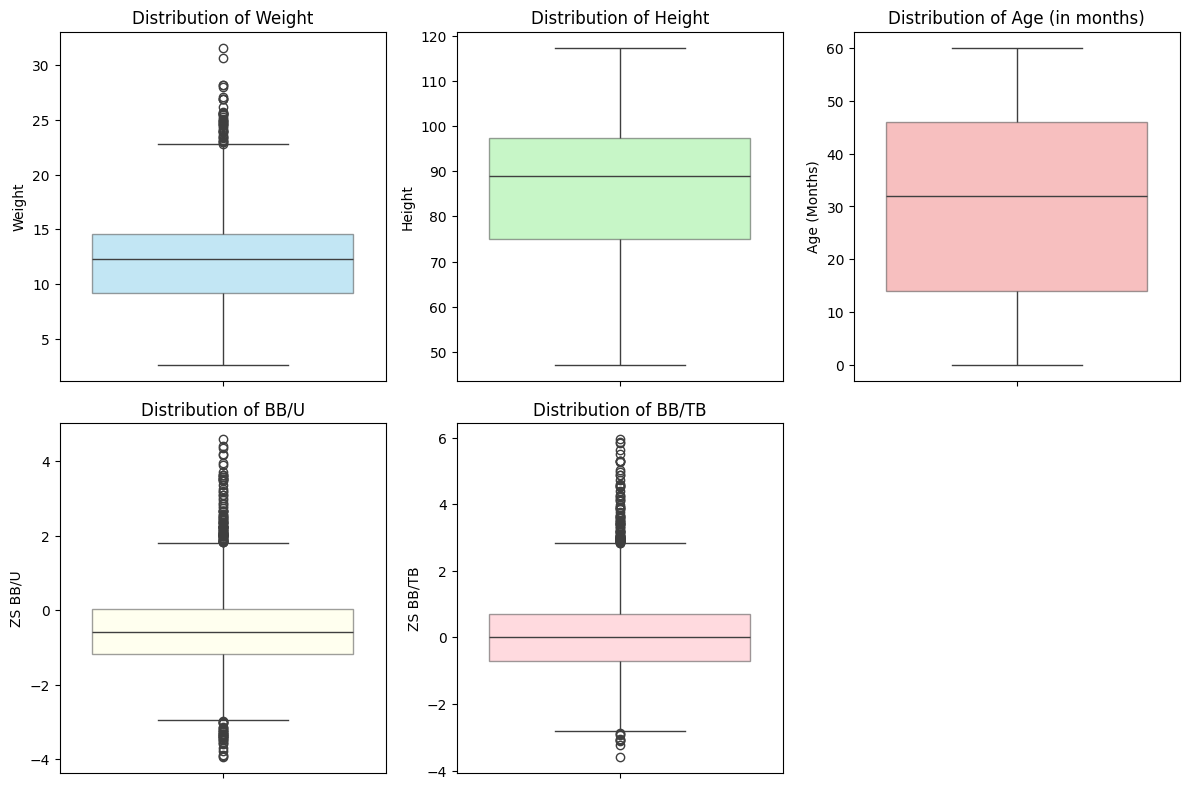

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure with subplots (2 rows, 3 columns)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Distribution of Weight
sns.boxplot(y=df['Berat'], orient='v', ax=axes[0, 0], patch_artist=True, boxprops=dict(facecolor='skyblue', alpha=0.5))
axes[0, 0].set_title('Distribution of Weight')
axes[0, 0].set_ylabel('Weight')

# Distribution of Height
sns.boxplot(y=df['Tinggi'], orient='v', ax=axes[0, 1], patch_artist=True, boxprops=dict(facecolor='lightgreen', alpha=0.5))
axes[0, 1].set_title('Distribution of Height')
axes[0, 1].set_ylabel('Height')

# Distribution of Age (in months)
sns.boxplot(y=df['Umur Bulan'], orient='v', ax=axes[0, 2], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.5))
axes[0, 2].set_title('Distribution of Age (in months)')
axes[0, 2].set_ylabel('Age (Months)')

# Distribution of ZS BB/U (Z-Score of BB/U)
sns.boxplot(y=df['ZS BB/U'], orient='v', ax=axes[1, 0], patch_artist=True, boxprops=dict(facecolor='lightyellow', alpha=0.5))
axes[1, 0].set_title('Distribution of BB/U')
axes[1, 0].set_ylabel('ZS BB/U')

# Distribution of ZS BB/TB (Z-Score of BB/TB)
sns.boxplot(y=df['ZS BB/TB'], orient='v', ax=axes[1, 1], patch_artist=True, boxprops=dict(facecolor='lightpink', alpha=0.5))
axes[1, 1].set_title('Distribution of BB/TB')
axes[1, 1].set_ylabel('ZS BB/TB')

# Remove the empty subplot at axes[1, 2] (no data for it)
fig.delaxes(axes[1, 2])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

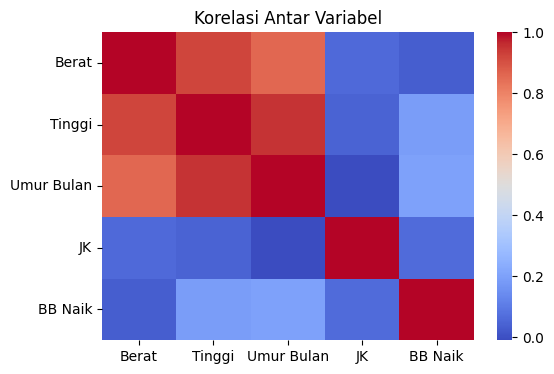

In [43]:
# Plotting a heatmap to show the correlation between numeric variables
df_numeric = df.select_dtypes(include=[float, int])
plt.figure(figsize=(6, 4))
sns.heatmap(df_numeric.corr(), cmap='coolwarm')

plt.title('Korelasi Antar Variabel')
plt.show()

## EDA BB/TB

In [13]:
# Mapping kelas baru untuk BB/TB
class_mapping = {
    'Gizi Kurang': 'Gizi Kurang',
    'Gizi Buruk': 'Gizi Kurang',  # Gabungkan Gizi Buruk dengan Gizi Kurang
    'Gizi Baik': 'Gizi Baik',
    'Gizi Lebih': 'Gizi Lebih',
    'Risiko Gizi Lebih': 'Gizi Lebih',  # Gabungkan Risiko Gizi Lebih dengan Gizi Lebih
    'Obesitas': 'Gizi Lebih'  # Gabungkan Obesitas dengan Gizi Lebih
}

# Terapkan mapping ke kolom 'BB/TB'
df['BB/TB'] = df['BB/TB'].map(class_mapping)

# Lihat distribusi kelas baru
print(df['BB/TB'].value_counts())

BB/TB
Gizi Baik      3115
Gizi Lebih      589
Gizi Kurang      83
Name: count, dtype: int64


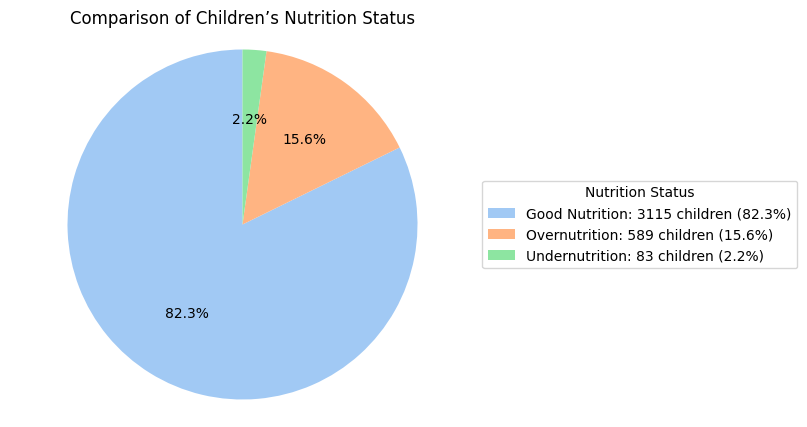

BB/TB
Gizi Baik      3115
Gizi Lebih      589
Gizi Kurang      83
Name: count, dtype: int64


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels
label_mapping = {
    'Gizi Baik': 'Good Nutrition',
    'Risiko Gizi Lebih': 'Risk of Overnutrition',
    'Gizi Lebih': 'Overnutrition',
    'Gizi Kurang': 'Undernutrition',
    'Obesitas': 'Obesity',
    'Gizi Buruk': 'Severe Malnutrition'
}

# Count the occurrences of each category in BB/TB (without filtering)
nutrition_counts = df['BB/TB'].value_counts()

# Calculate percentages
nutrition_percentages = (nutrition_counts / nutrition_counts.sum()) * 100

# Define pastel colors
pastel_colors = sns.color_palette("pastel", n_colors=len(nutrition_counts))

# Plotting pie chart
plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(nutrition_counts, colors=pastel_colors, labels=None, autopct='%1.1f%%', startangle=90)

# Adding legend with percentages and counts (in English)
legend_labels = [f"{label_mapping[label]}: {count} children ({percentage:.1f}%)" for label, count, percentage in zip(nutrition_counts.index, nutrition_counts, nutrition_percentages)]
plt.legend(wedges, legend_labels, title="Nutrition Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Comparison of Children’s Nutrition Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the counts in English
print(nutrition_counts)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_21265/3035672793.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=nutrition_counts.index, y=nutrition_counts.values, palette="pastel")


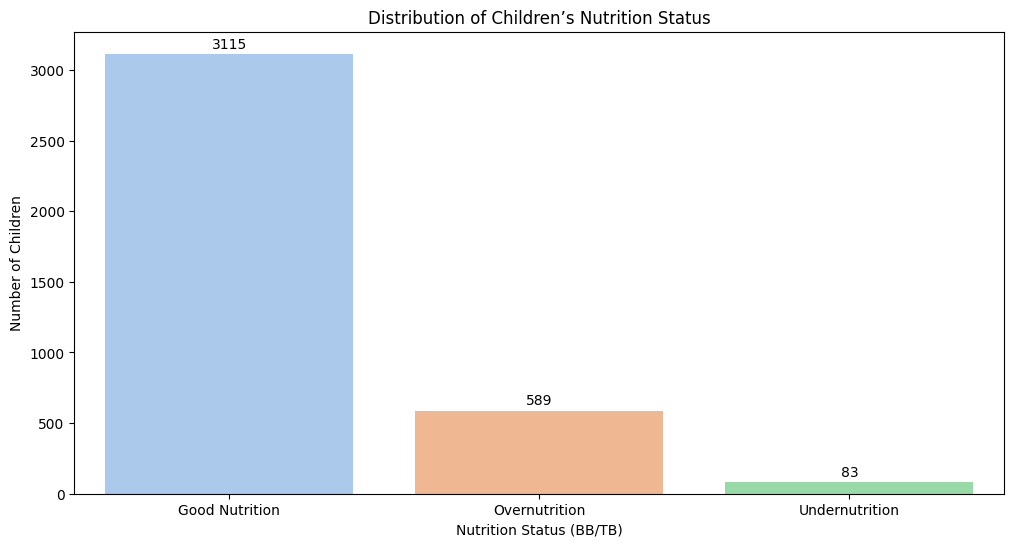

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels
label_mapping = {
    'Gizi Baik': 'Good Nutrition',
    'Risiko Gizi Lebih': 'Risk of Overnutrition',
    'Gizi Lebih': 'Overnutrition',
    'Gizi Kurang': 'Undernutrition',
    'Obesitas': 'Obesity',
    'Gizi Buruk': 'Severe Malnutrition'
}

# Count the occurrences of each category in BB/TB
nutrition_counts = df['BB/TB'].value_counts()

# Plotting bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=nutrition_counts.index, y=nutrition_counts.values, palette="pastel")

# Display counts above bars
for i, count in enumerate(nutrition_counts.values):
    plt.text(i, count + 20, f'{count}', ha='center', va='bottom', fontsize=10)

plt.xlabel("Nutrition Status (BB/TB)")
plt.ylabel("Number of Children")
plt.title("Distribution of Children’s Nutrition Status")
plt.xticks(ticks=range(len(nutrition_counts.index)), labels=[label_mapping[label] for label in nutrition_counts.index])
plt.show()

## EDA BB/U

In [16]:
# Pemetaan kelas baru BB/U
class_mapping_bbu = {
    'Sangat Kurang': 'Kurang',  # Gabungkan 'Sangat Kurang' dengan 'Kurang'
    'Kurang': 'Kurang',
    'Berat Badan Normal': 'Normal',  # 'Normal' untuk kelas yang sudah ada
    'Risiko Lebih': 'Risiko Lebih'  # 'Risiko Lebih' tetap
}

# Terapkan mapping ke kolom 'BB/U'
df['BB/U'] = df['BB/U'].map(class_mapping_bbu)

# Lihat distribusi kelas baru untuk BB/U
print(df['BB/U'].value_counts())

BB/U
Normal          3318
Risiko Lebih     238
Kurang           231
Name: count, dtype: int64


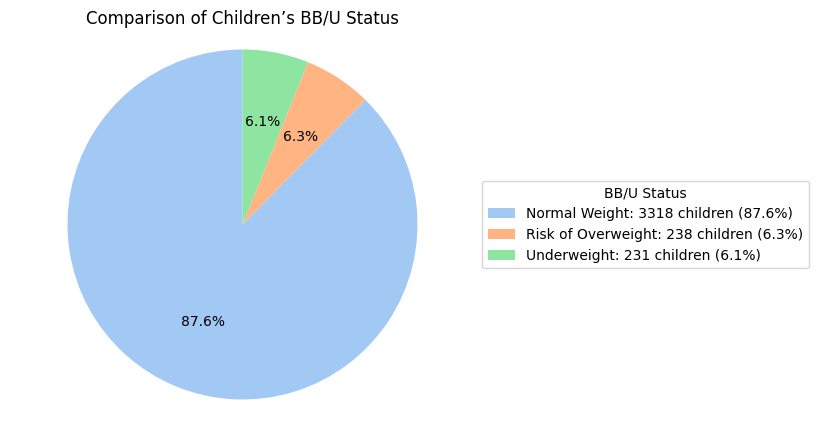

BB/U
Normal          3318
Risiko Lebih     238
Kurang           231
Name: count, dtype: int64


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map kelas baru BB/U ke label bahasa Inggris
label_mapping_bb_u = {
    'Normal': 'Normal Weight',
    'Risiko Lebih': 'Risk of Overweight',
    'Kurang': 'Underweight'
}

# Hitung frekuensi masing-masing kategori BB/U
bb_u_counts = df['BB/U'].value_counts()

# Hitung persentase
bb_u_percentages = (bb_u_counts / bb_u_counts.sum()) * 100

# Tentukan warna pastel
pastel_colors = sns.color_palette("pastel", n_colors=len(bb_u_counts))

# Plot pie chart
plt.figure(figsize=(6, 5))
wedges, texts, autotexts = plt.pie(bb_u_counts, colors=pastel_colors, labels=None, autopct='%1.1f%%', startangle=90)

# Menambahkan legenda dengan label dalam bahasa Inggris dan persentase
legend_labels = [f"{label_mapping_bb_u[label]}: {count} children ({percentage:.1f}%)" 
                 for label, count, percentage in zip(bb_u_counts.index, bb_u_counts, bb_u_percentages)]
plt.legend(wedges, legend_labels, title="BB/U Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Comparison of Children’s BB/U Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Print the counts in Indonesian
print(bb_u_counts)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_21265/698890732.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bb_u_counts.index, y=bb_u_counts.values, palette="pastel")


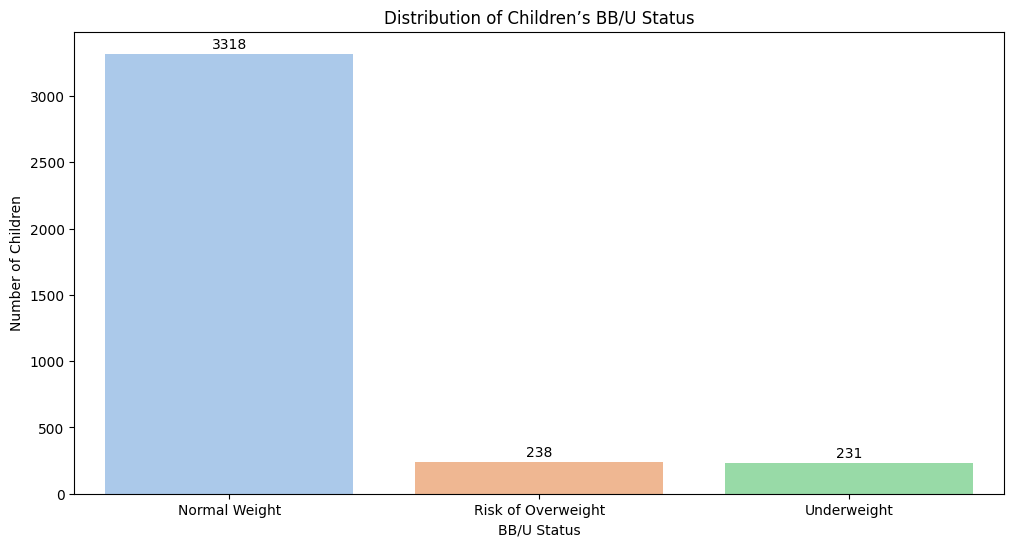

BB/U
Normal          3318
Risiko Lebih     238
Kurang           231
Name: count, dtype: int64


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels
label_mapping_bb_u = {
    'Normal': 'Normal Weight',
    'Risiko Lebih': 'Risk of Overweight',
    'Kurang': 'Underweight',
    'Sangat Kurang': 'Severely Underweight'
}

# Count the occurrences of each category in BB/U
bb_u_counts = df['BB/U'].value_counts()

# Plotting bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=bb_u_counts.index, y=bb_u_counts.values, palette="pastel")

# Display counts above bars
for i, count in enumerate(bb_u_counts.values):
    plt.text(i, count + 20, f'{count}', ha='center', va='bottom', fontsize=10)

plt.xlabel("BB/U Status")
plt.ylabel("Number of Children")
plt.title("Distribution of Children’s BB/U Status")

# Update x-axis labels to show English categories
plt.xticks(ticks=range(len(bb_u_counts.index)), labels=[label_mapping_bb_u[label] for label in bb_u_counts.index])
plt.show()

# Print the counts in Indonesian
print(bb_u_counts)

## EDA Fitur

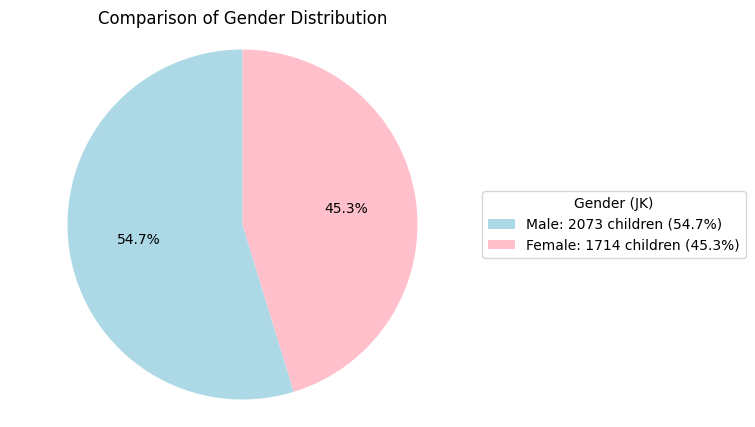

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels for 'JK' (Gender)
label_mapping_jk = {
    'L': 'Male',
    'P': 'Female'
}

# Clean the 'JK' column by stripping whitespace or non-printable characters
df['JK'] = df['JK'].str.strip()

# Count occurrences in the 'JK' column
jk_counts = df['JK'].value_counts()

# Calculate percentages
jk_percentages = (jk_counts / jk_counts.sum()) * 100

# Define custom pastel colors for gender
custom_colors_jk = ['#ADD8E6', '#FFC0CB']  # Light blue for Male, Pink for Female

# Plotting pie chart for JK (gender)
plt.figure(figsize=(6, 5))
wedges_jk, texts_jk, autotexts_jk = plt.pie(jk_counts, colors=custom_colors_jk, labels=None, autopct='%1.1f%%', startangle=90)

# Adding legend with percentages and counts for JK
legend_labels_jk = [f"{label_mapping_jk[label]}: {count} children ({percentage:.1f}%)" for label, count, percentage in zip(jk_counts.index, jk_counts, jk_percentages)]
plt.legend(wedges_jk, legend_labels_jk, title="Gender (JK)", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Comparison of Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_21265/324006762.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


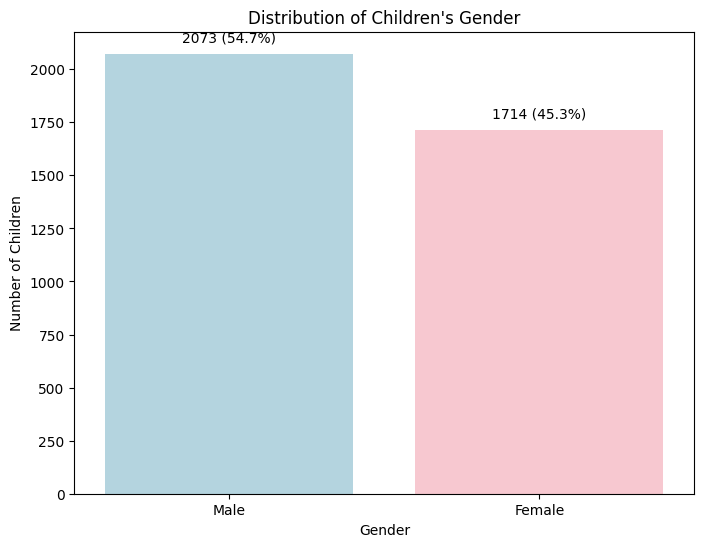

JK
L    2073
P    1714
Name: count, dtype: int64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels for 'JK' (Gender)
label_mapping_jk = {
    'L': 'Male',
    'P': 'Female'
}

# Clean the 'JK' column by stripping whitespace or non-printable characters
df['JK'] = df['JK'].str.strip()

# Count occurrences in the 'JK' column
jk_counts = df['JK'].value_counts()

# Calculate percentages
jk_percentages = (jk_counts / jk_counts.sum()) * 100

# Define custom pastel colors for gender
custom_colors_jk = ['#ADD8E6', '#FFC0CB']  # Light blue for Male, Pink for Female

# Create bar chart
plt.figure(figsize=(8, 6))
sns.barplot(
    x=jk_counts.index, 
    y=jk_counts.values, 
    palette=custom_colors_jk
)

# Annotate each bar with the count and percentage
for i, (count, percentage) in enumerate(zip(jk_counts.values, jk_percentages)):
    plt.text(
        i, 
        count + max(jk_counts.values) * 0.02,  # Position above the bar
        f'{count} ({percentage:.1f}%)', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Update x-axis labels to show English categories
plt.xticks(ticks=range(len(jk_counts.index)), 
           labels=[label_mapping_jk[label] for label in jk_counts.index])

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Number of Children")
plt.title("Distribution of Children's Gender")

# Show the plot
plt.show()

# Print the counts in Indonesian for reference
print(jk_counts)


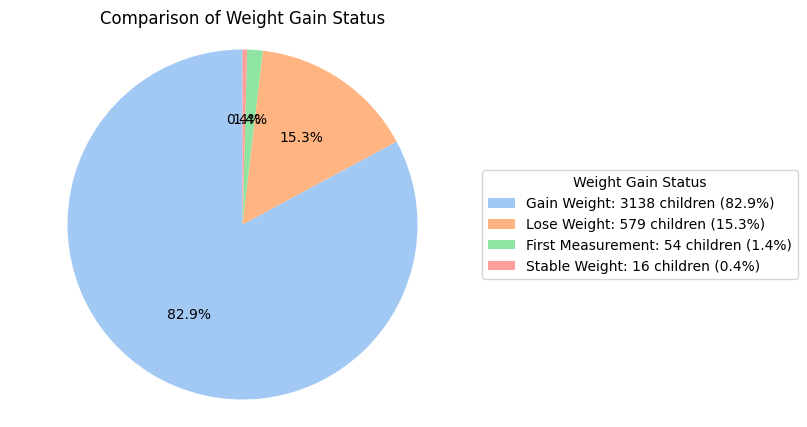

Naik Berat Badan
N    3138
T     579
-      54
O      16
Name: count, dtype: int64


In [21]:
# Map Indonesian labels to English labels for 'Naik Berat Badan' (Weight Gain)
label_mapping_naik_bb = {
    'N': 'Gain Weight',
    'T': 'Lose Weight',
    'O': 'Stable Weight',
    '-': 'First Measurement'
}

# Pie chart for the 'Naik Berat Badan' (Weight Gain) column
naik_bb_counts = df['Naik Berat Badan'].value_counts()
naik_bb_percentages = (naik_bb_counts / naik_bb_counts.sum()) * 100

# Define pastel colors for Naik Berat Badan
pastel_colors_naik_bb = sns.color_palette("pastel", n_colors=len(naik_bb_counts))

# Plotting pie chart for Naik Berat Badan (Weight Gain)
plt.figure(figsize=(6, 5))
wedges_naik_bb, texts_naik_bb, autotexts_naik_bb = plt.pie(naik_bb_counts, colors=pastel_colors_naik_bb, labels=None, autopct='%1.1f%%', startangle=90)

# Adding legend with percentages and counts for Naik Berat Badan
legend_labels_naik_bb = [f"{label_mapping_naik_bb[label]}: {count} children ({percentage:.1f}%)" for label, count, percentage in zip(naik_bb_counts.index, naik_bb_counts, naik_bb_percentages)]
plt.legend(wedges_naik_bb, legend_labels_naik_bb, title="Weight Gain Status", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Comparison of Weight Gain Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(naik_bb_counts)

/var/folders/4s/bfs93j3x2rl1nkns6mld6m_w0000gn/T/ipykernel_21265/1639716738.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


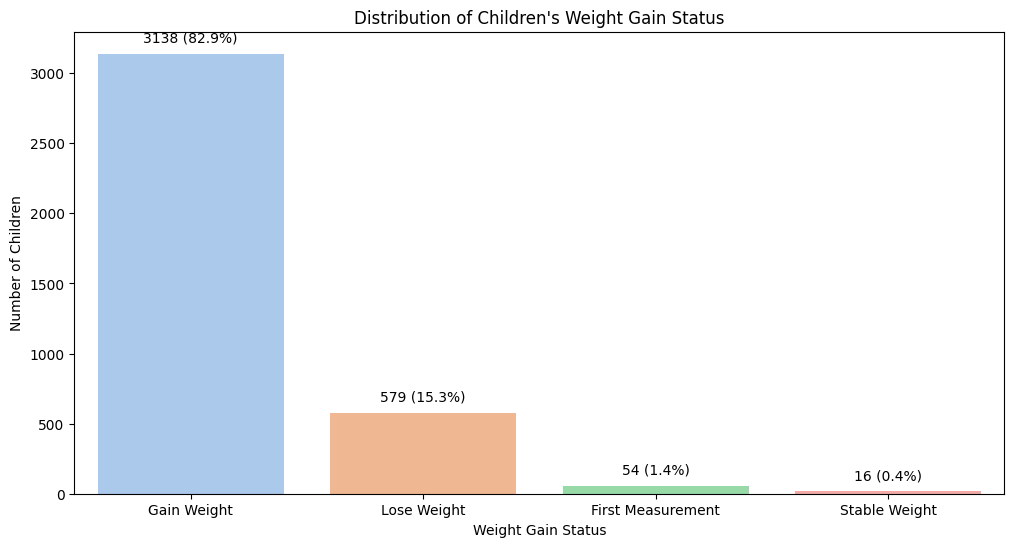

Naik Berat Badan
N    3138
T     579
-      54
O      16
Name: count, dtype: int64


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map Indonesian labels to English labels for 'Naik Berat Badan'
label_mapping_naik_bb = {
    'N': 'Gain Weight',
    'T': 'Lose Weight',
    'O': 'Stable Weight',
    '-': 'First Measurement'
}

# Count the occurrences in the 'Naik Berat Badan' column
naik_bb_counts = df['Naik Berat Badan'].value_counts()

# Calculate percentages
naik_bb_percentages = (naik_bb_counts / naik_bb_counts.sum()) * 100

# Define pastel colors for the bar chart
pastel_colors_naik_bb = sns.color_palette("pastel", n_colors=len(naik_bb_counts))

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x=naik_bb_counts.index, 
    y=naik_bb_counts.values, 
    palette=pastel_colors_naik_bb
)

# Annotate each bar with the count and percentage
for i, (count, percentage) in enumerate(zip(naik_bb_counts.values, naik_bb_percentages)):
    plt.text(
        i, 
        count + max(naik_bb_counts.values) * 0.02,  # Positioning above the bar
        f'{count} ({percentage:.1f}%)', 
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Update x-axis labels to show English categories
plt.xticks(ticks=range(len(naik_bb_counts.index)), 
           labels=[label_mapping_naik_bb[label] for label in naik_bb_counts.index])

# Add labels and title
plt.xlabel("Weight Gain Status")
plt.ylabel("Number of Children")
plt.title("Distribution of Children's Weight Gain Status")

# Show the plot
plt.show()

# Print the counts in Indonesian for reference
print(naik_bb_counts)

# Features

In [23]:
df[['BB/U', 'BB/TB','JK', 'Naik Berat Badan']].describe(include='object')

,BB/U,BB/TB,JK,Naik Berat Badan
count,3787,3787,3787,3787
unique,3,3,2,4
top,Normal,Gizi Baik,L,N
freq,3318,3115,2073,3138


In [24]:
# Encoding kolom "JK" untuk "Jenis Kelamin" (L=1 untuk laki-laki, P=0 untuk perempuan)
df["JK"] = df["JK"].apply(lambda x: 1 if x == "L" else 0)

# Encoding kolom "Naik Berat Badan" menjadi nilai numerik (2 untuk '0', 1 untuk 'N', 0 untuk selain itu)
df["BB Naik"] = df["Naik Berat Badan"].apply(lambda x: 2 if x == "0" else 1 if x == "N" else 0)

In [25]:
# Defining columns to be used for features (X) and target (y)
x = ['Berat','Tinggi','Umur Bulan', "JK", "BB Naik"]
y_bbu = ['BB/U']
y_bbtb = ['BB/TB']

In [26]:
# Keeping only the specified columns in the DataFrame
df = df[x + y_bbu + y_bbtb]

In [27]:
# Displaying the DataFrame after selecting columns
print(df.head())

   Berat  Tinggi  Umur Bulan  JK  BB Naik    BB/U       BB/TB
0    3.1    50.1           1   0        1  Kurang   Gizi Baik
1   17.3   102.9          59   0        1  Normal   Gizi Baik
2   18.9   101.9          59   1        1  Normal  Gizi Lebih
3   14.5   102.0          59   0        1  Normal   Gizi Baik
4   18.8   100.4          58   0        1  Normal  Gizi Lebih


In [28]:
# Displaying the unique values in the target column
print("BB/U Unique Values :", df['BB/U'].unique(), "\n")
print("BB/TB Unique Values :", df['BB/TB'].unique())

BB/U Unique Values : ['Kurang' 'Normal' 'Risiko Lebih'] 

BB/TB Unique Values : ['Gizi Baik' 'Gizi Lebih' 'Gizi Kurang']


In [29]:
# Displaying the updated DataFrame
df

,Berat,Tinggi,Umur Bulan,JK,BB Naik,BB/U,BB/TB
0,3.1,50.1,1,0,1,Kurang,Gizi Baik
1,17.3,102.9,59,0,1,Normal,Gizi Baik
2,18.9,101.9,59,1,1,Normal,Gizi Lebih
3,14.5,102.0,59,0,1,Normal,Gizi Baik
4,18.8,100.4,58,0,1,Normal,Gizi Lebih
...,...,...,...,...,...,...,...
3782,3.0,50.0,0,0,0,Normal,Gizi Baik
3783,3.4,50.0,0,0,0,Normal,Gizi Baik
3784,3.5,49.0,0,1,0,Normal,Gizi Baik
3785,3.5,50.0,0,1,0,Normal,Gizi Baik


# Data Understanding

In [30]:
# Displaying the shape of the DataFrame
print("Data Shape : ", df.shape)

Data Shape :  (3787, 7)


In [31]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3787 entries, 0 to 3786
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Berat       3787 non-null   float64
 1   Tinggi      3787 non-null   float64
 2   Umur Bulan  3787 non-null   int64  
 3   JK          3787 non-null   int64  
 4   BB Naik     3787 non-null   int64  
 5   BB/U        3787 non-null   object 
 6   BB/TB       3787 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 207.2+ KB


In [32]:
# Displaying descriptive statistics of selected columns
df[['Umur Bulan', 'Berat', 'Tinggi']].describe()

,Umur Bulan,Berat,Tinggi
count,3787.000000,3787.000000,3787.000000
mean,30.514127,12.143800,85.947557
std,17.733515,3.976551,14.360416
min,0.000000,2.570000,47.000000
25%,14.000000,9.165000,75.000000
50%,32.000000,12.250000,88.900000
75%,46.000000,14.600000,97.400000
max,60.000000,31.600000,117.400000


In [33]:
df[['BB/U', 'BB/TB']].describe(include='object')

,BB/U,BB/TB
count,3787,3787
unique,3,3
top,Normal,Gizi Baik
freq,3318,3115


In [34]:
# Displaying the count of each unique value in the 'BB/U' column
df['BB/U'].value_counts()

BB/U
Normal          3318
Risiko Lebih     238
Kurang           231
Name: count, dtype: int64

In [35]:
# Displaying the count of each unique value in the 'BB/TB' column
df['BB/TB'].value_counts()

BB/TB
Gizi Baik      3115
Gizi Lebih      589
Gizi Kurang      83
Name: count, dtype: int64

# Data Cleaning

In [36]:
# Displaying the shape of the DataFrame
df.shape

(3787, 7)

In [37]:
# Displaying the count of missing values in each column
df.isnull().sum()

Berat         0
Tinggi        0
Umur Bulan    0
JK            0
BB Naik       0
BB/U          0
BB/TB         0
dtype: int64

In [38]:
# Displaying the count of duplicate rows
df.duplicated().sum()

49

In [39]:
# Removing duplicate rows from the DataFrame
df = df.drop_duplicates()

In [40]:
# Displaying the shape of the DataFrame after removing duplicates
df.shape

(3738, 7)

In [ ]:
# Displaying the count of each unique value in the 'BB/U' column
df['BB/U'].value_counts()

In [ ]:
# Displaying the count of each unique value in the 'BB/TB' column
df['BB/TB'].value_counts()

# Data Preparation

In [41]:
df

,Berat,Tinggi,Umur Bulan,JK,BB Naik,BB/U,BB/TB
0,3.1,50.1,1,0,1,Kurang,Gizi Baik
1,17.3,102.9,59,0,1,Normal,Gizi Baik
2,18.9,101.9,59,1,1,Normal,Gizi Lebih
3,14.5,102.0,59,0,1,Normal,Gizi Baik
4,18.8,100.4,58,0,1,Normal,Gizi Lebih
...,...,...,...,...,...,...,...
3781,2.8,49.0,0,0,0,Normal,Gizi Baik
3782,3.0,50.0,0,0,0,Normal,Gizi Baik
3783,3.4,50.0,0,0,0,Normal,Gizi Baik
3784,3.5,49.0,0,1,0,Normal,Gizi Baik


In [49]:
df.head()

,Berat,Tinggi,Umur Bulan,JK,BB Naik,BB/U,BB/TB
0,3.1,50.1,1,0,1,Kurang,Gizi Baik
1,17.3,102.9,59,0,1,Normal,Gizi Baik
2,18.9,101.9,59,1,1,Normal,Gizi Lebih
3,14.5,102.0,59,0,1,Normal,Gizi Baik
4,18.8,100.4,58,0,1,Normal,Gizi Lebih


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 0 to 3786
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Berat       3738 non-null   float64
 1   Tinggi      3738 non-null   float64
 2   Umur Bulan  3738 non-null   int64  
 3   JK          3738 non-null   int64  
 4   BB Naik     3738 non-null   int64  
 5   BB/U        3738 non-null   object 
 6   BB/TB       3738 non-null   object 
dtypes: float64(2), int64(3), object(2)
memory usage: 233.6+ KB


In [51]:
# Defining features and target variables
X = df[['Berat', 'Tinggi', 'Umur Bulan', 'JK', 'BB Naik']]
y_bbu = df['BB/U']
y_bbtb = df['BB/TB']

In [52]:
# Splitting the data into training and testing sets for both target variables
X_train, X_test, y_train_bbu, y_test_bbu, y_train_bbtb, y_test_bbtb = train_test_split(X, y_bbu, y_bbtb, test_size=0.2, random_state=42)

In [53]:
# Displaying the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train_bbu shape:", y_train_bbu.shape)
print("y_test_bbu shape:", y_test_bbu.shape)

print("y_train_bbtb shape:", y_train_bbtb.shape)
print("y_test_bbtb shape:", y_test_bbtb.shape)

X_train shape: (2990, 5)
X_test shape: (748, 5)
y_train_bbu shape: (2990,)
y_test_bbu shape: (748,)
y_train_bbtb shape: (2990,)
y_test_bbtb shape: (748,)


## Scaler

In [54]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Scaling data untuk SVM
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dataset asli untuk Naive Bayes
X_train_original = X_train.copy()
X_test_original = X_test.copy()

## SMOTE

In [55]:
# Terapkan SMOTE untuk menangani ketidakseimbangan kelas pada data latih
smote = SMOTE(random_state=42, k_neighbors=3)  # Menurunkan k_neighbors ke 3

# Terapkan SMOTE pada BB/U
X_train_bbu_smote, y_train_bbu_smote = smote.fit_resample(X_train_scaled, y_train_bbu)

# Terapkan SMOTE pada BB/TB
X_train_bbtb_smote, y_train_bbtb_smote = smote.fit_resample(X_train_scaled, y_train_bbtb)


In [56]:
# Menampilkan distribusi kelas setelah SMOTE untuk BB/U
print("\nDistribusi kelas setelah SMOTE (BB/U):")
print(pd.Series(y_train_bbu_smote).value_counts())

# Menampilkan distribusi kelas setelah SMOTE untuk BB/TB
print("\nDistribusi kelas setelah SMOTE (BB/TB):")
print(pd.Series(y_train_bbtb_smote).value_counts())


Distribusi kelas setelah SMOTE (BB/U):
BB/U
Normal          2611
Kurang          2611
Risiko Lebih    2611
Name: count, dtype: int64

Distribusi kelas setelah SMOTE (BB/TB):
BB/TB
Gizi Baik      2448
Gizi Lebih     2448
Gizi Kurang    2448
Name: count, dtype: int64


## Imbalanced Check

In [57]:
# Menampilkan distribusi kelas pada target variable
print(df['BB/U'].value_counts())  # Jika menggunakan BB/U
print(df['BB/TB'].value_counts())  # Jika menggunakan BB/TB

BB/U
Normal          3269
Risiko Lebih     238
Kurang           231
Name: count, dtype: int64
BB/TB
Gizi Baik      3068
Gizi Lebih      587
Gizi Kurang      83
Name: count, dtype: int64


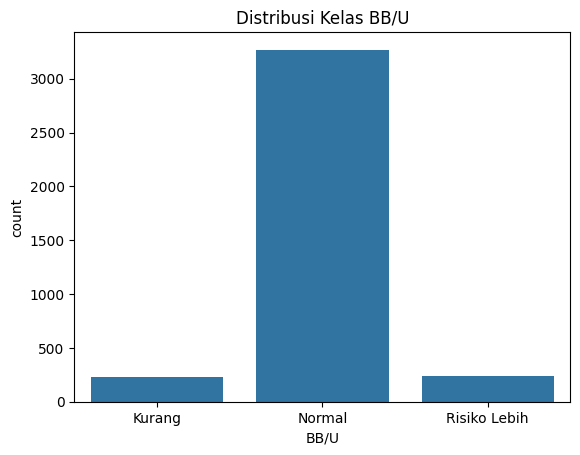

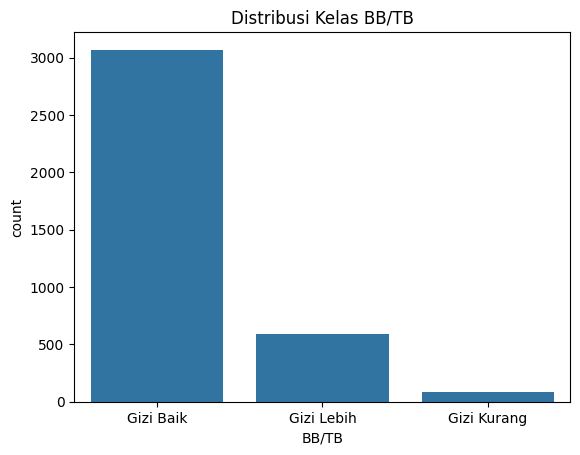

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas untuk BB/U
sns.countplot(x='BB/U', data=df)
plt.title("Distribusi Kelas BB/U")
plt.show()

# Visualisasi distribusi kelas untuk BB/TB
sns.countplot(x='BB/TB', data=df)
plt.title("Distribusi Kelas BB/TB")
plt.show()

# KNN

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # ------------------- KNN untuk BB/U -------------------
# # Inisialisasi model KNN
# knn_bbu_smote = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat
# knn_bbu_smote.fit(X_train_bbu_smote, y_train_bbu_smote)  # Melatih model dengan data SMOTE

# # Prediksi data test
# y_bbu_pred_smote = knn_bbu_smote.predict(X_test_scaled)

# # Evaluasi performa
# knn_bbu_acc_smote = accuracy_score(y_test_bbu, y_bbu_pred_smote)
# print("KNN Classification Report for BB/U dengan SMOTE:")
# print(classification_report(y_test_bbu, y_bbu_pred_smote))
# print("Akurasi KNN untuk BB/U dengan SMOTE: {:.2f}%".format(knn_bbu_acc_smote * 100))

# # Confusion matrix untuk BB/U
# cm_bbu_smote = confusion_matrix(y_test_bbu, y_bbu_pred_smote)
# print("Confusion Matrix for BB/U dengan SMOTE:")
# print(cm_bbu_smote)

# # Akurasi dari Confusion Matrix
# accuracy_bbu_from_cm_smote = np.trace(cm_bbu_smote) / float(np.sum(cm_bbu_smote))
# print("KNN Accuracy for BB/U from Confusion Matrix dengan SMOTE:", accuracy_bbu_from_cm_smote)

KNN Classification Report for BB/U dengan SMOTE:
              precision    recall  f1-score   support

      Kurang       0.83      0.91      0.87        43
      Normal       0.99      0.97      0.98       658
Risiko Lebih       0.78      0.89      0.83        47

    accuracy                           0.96       748
   macro avg       0.86      0.92      0.89       748
weighted avg       0.96      0.96      0.96       748

Akurasi KNN untuk BB/U dengan SMOTE: 96.12%
Confusion Matrix for BB/U dengan SMOTE:
[[ 39   4   0]
 [  8 638  12]
 [  0   5  42]]
KNN Accuracy for BB/U from Confusion Matrix dengan SMOTE: 0.9612299465240641


In [ ]:
# # ------------------- KNN untuk BB/TB -------------------
# # Inisialisasi model KNN
# knn_bbtb_smote = KNeighborsClassifier(n_neighbors=5)  # Menggunakan 5 tetangga terdekat
# knn_bbtb_smote.fit(X_train_bbtb_smote, y_train_bbtb_smote)  # Melatih model dengan data SMOTE

# # Prediksi data test
# y_bbtb_pred_smote = knn_bbtb_smote.predict(X_test_scaled)

# # Evaluasi performa
# knn_bbtb_acc_smote = accuracy_score(y_test_bbtb, y_bbtb_pred_smote)
# print("\nKNN Classification Report for BB/TB dengan SMOTE:")
# print(classification_report(y_test_bbtb, y_bbtb_pred_smote))
# print("Akurasi KNN untuk BB/TB dengan SMOTE: {:.2f}%".format(knn_bbtb_acc_smote * 100))

# # Confusion matrix untuk BB/TB
# cm_bbtb_smote = confusion_matrix(y_test_bbtb, y_bbtb_pred_smote)
# print("Confusion Matrix for BB/TB dengan SMOTE:")
# print(cm_bbtb_smote)

# # Akurasi dari Confusion Matrix
# accuracy_bbtb_from_cm_smote = np.trace(cm_bbtb_smote) / float(np.sum(cm_bbtb_smote))
# print("KNN Accuracy for BB/TB from Confusion Matrix dengan SMOTE:", accuracy_bbtb_from_cm_smote)


KNN Classification Report for BB/TB dengan SMOTE:
              precision    recall  f1-score   support

   Gizi Baik       0.98      0.92      0.95       620
 Gizi Kurang       0.48      0.93      0.63        14
  Gizi Lebih       0.75      0.90      0.82       114

    accuracy                           0.92       748
   macro avg       0.74      0.92      0.80       748
weighted avg       0.94      0.92      0.92       748

Akurasi KNN untuk BB/TB dengan SMOTE: 91.98%
Confusion Matrix for BB/TB dengan SMOTE:
[[572  14  34]
 [  1  13   0]
 [ 11   0 103]]
KNN Accuracy for BB/TB from Confusion Matrix dengan SMOTE: 0.9197860962566845


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Parameter grid untuk tuning
param_grid = {
    'n_neighbors': range(1, 31),  # Uji jumlah tetangga dari 1 hingga 30
    'weights': ['uniform', 'distance'],  # Uji skema bobot
    'metric': ['euclidean', 'manhattan']  # Uji metrik jarak
}

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# ---- parameter utk BB/U -------
# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bbu_smote, y_train_bbu_smote)

# Output parameter terbaik
print("Best Parameters for BB/U:", grid_search.best_params_)
print("Best Accuracy for BB/U:", grid_search.best_score_)

# Melatih model dengan parameter terbaik
best_knn_bbu = grid_search.best_estimator_


# ---- parameter utk BB/TB -------
grid_search_bbtb = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_bbtb.fit(X_train_bbtb_smote, y_train_bbtb_smote)

# Output parameter terbaik
print("Best Parameters for BB/TB:", grid_search_bbtb.best_params_)
print("Best Accuracy for BB/TB:", grid_search_bbtb.best_score_)

# Melatih model dengan parameter terbaik
best_knn_bbtb = grid_search_bbtb.best_estimator_

# ----- Uji Prediksi -----
# Prediksi data uji BB/U
y_bbu_pred_opt = best_knn_bbu.predict(X_test_scaled)
print("Akurasi untuk BB/U dengan parameter terbaik:", accuracy_score(y_test_bbu, y_bbu_pred_opt))

# Prediksi data uji BB/TB
y_bbtb_pred_opt = best_knn_bbtb.predict(X_test_scaled)
print("Akurasi untuk BB/TB dengan parameter terbaik:", accuracy_score(y_test_bbtb, y_bbtb_pred_opt))

Best Parameters for BB/U: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy for BB/U: 0.9919574460801932
Best Parameters for BB/TB: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy for BB/TB: 0.9818894760564844
Akurasi untuk BB/U dengan parameter terbaik: 0.9665775401069518
Akurasi untuk BB/TB dengan parameter terbaik: 0.9358288770053476


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inisialisasi model KNN dengan parameter terbaik
knn_bbu = KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='uniform')

# Latih model KNN pada data BB/U yang telah di-SMOTE
knn_bbu.fit(X_train_bbu_smote, y_train_bbu_smote)

# Prediksi data uji BB/U
y_bbu_pred = knn_bbu.predict(X_test_scaled)

# Evaluasi performa model
accuracy_bbu = accuracy_score(y_test_bbu, y_bbu_pred)
print("KNN Classification Report for BB/U:")
print(classification_report(y_test_bbu, y_bbu_pred))
print("Akurasi KNN untuk BB/U: {:.2f}%".format(accuracy_bbu * 100))

# Confusion matrix untuk BB/U
cm_bbu = confusion_matrix(y_test_bbu, y_bbu_pred)
print("Confusion Matrix for BB/U:")
print(cm_bbu)

KNN Classification Report for BB/U:
              precision    recall  f1-score   support

      Kurang       0.90      0.86      0.88        43
      Normal       0.98      0.99      0.98       658
Risiko Lebih       0.88      0.79      0.83        47

    accuracy                           0.97       748
   macro avg       0.92      0.88      0.90       748
weighted avg       0.97      0.97      0.97       748

Akurasi KNN untuk BB/U: 96.66%
Confusion Matrix for BB/U:
[[ 37   6   0]
 [  4 649   5]
 [  0  10  37]]


In [ ]:
# Inisialisasi model KNN dengan parameter terbaik
knn_bbtb = KNeighborsClassifier(metric='euclidean', n_neighbors=1, weights='uniform')

# Latih model KNN pada data BB/TB yang telah di-SMOTE
knn_bbtb.fit(X_train_bbtb_smote, y_train_bbtb_smote)

# Prediksi data uji BB/TB
y_bbtb_pred = knn_bbtb.predict(X_test_scaled)

# Evaluasi performa model
accuracy_bbtb = accuracy_score(y_test_bbtb, y_bbtb_pred)
print("\nKNN Classification Report for BB/TB:")
print(classification_report(y_test_bbtb, y_bbtb_pred))
print("Akurasi KNN untuk BB/TB: {:.2f}%".format(accuracy_bbtb * 100))

# Confusion matrix untuk BB/TB
cm_bbtb = confusion_matrix(y_test_bbtb, y_bbtb_pred)
print("Confusion Matrix for BB/TB:")
print(cm_bbtb)


KNN Classification Report for BB/TB:
              precision    recall  f1-score   support

   Gizi Baik       0.97      0.96      0.96       620
 Gizi Kurang       0.69      0.79      0.73        14
  Gizi Lebih       0.81      0.84      0.83       114

    accuracy                           0.94       748
   macro avg       0.82      0.86      0.84       748
weighted avg       0.94      0.94      0.94       748

Akurasi KNN untuk BB/TB: 93.58%
Confusion Matrix for BB/TB:
[[593   5  22]
 [  3  11   0]
 [ 18   0  96]]


# Random Forest

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import GridSearchCV

# # Inisialisasi Random Forest
# rf_bbu = RandomForestClassifier(random_state=42)

# # Latih model dengan data BB/U
# rf_bbu.fit(X_train_bbu_smote, y_train_bbu_smote)

# # Prediksi hasil pada data uji
# y_bbu_pred_rf = rf_bbu.predict(X_test_scaled)

# # Evaluasi kinerja model
# print("Random Forest Classification Report untuk BB/U:")
# print(classification_report(y_test_bbu, y_bbu_pred_rf))
# print("Akurasi Random Forest untuk BB/U: {:.2f}%".format(accuracy_score(y_test_bbu, y_bbu_pred_rf) * 100))

# # Confusion Matrix untuk BB/U
# cm_bbu_rf = confusion_matrix(y_test_bbu, y_bbu_pred_rf)
# print("Confusion Matrix untuk BB/U:")
# print(cm_bbu_rf)

# # Akurasi dari Confusion Matrix BB/U
# accuracy_bbu_rf_from_cm = np.trace(cm_bbu_rf) / float(np.sum(cm_bbu_rf))
# print("Akurasi Random Forest untuk BB/U dari Confusion Matrix: {:.2f}%".format(accuracy_bbu_rf_from_cm * 100))

Random Forest Classification Report untuk BB/U:
              precision    recall  f1-score   support

      Kurang       0.90      0.84      0.87        43
      Normal       0.98      0.99      0.98       658
Risiko Lebih       0.91      0.87      0.89        47

    accuracy                           0.97       748
   macro avg       0.93      0.90      0.91       748
weighted avg       0.97      0.97      0.97       748

Akurasi Random Forest untuk BB/U: 97.19%
Confusion Matrix untuk BB/U:
[[ 36   7   0]
 [  4 650   4]
 [  0   6  41]]
Akurasi Random Forest untuk BB/U dari Confusion Matrix: 97.19%


In [ ]:
# # Terapkan Random Forest untuk BB/TB
# rf_bbtb = RandomForestClassifier(random_state=42)

# # Latih model dengan data BB/TB
# rf_bbtb.fit(X_train_bbtb_smote, y_train_bbtb_smote)

# # Prediksi hasil pada data uji
# y_bbtb_pred_rf = rf_bbtb.predict(X_test_scaled)

# # Evaluasi kinerja model
# print("\nRandom Forest Classification Report untuk BB/TB:")
# print(classification_report(y_test_bbtb, y_bbtb_pred_rf))
# print("Akurasi Random Forest untuk BB/TB: {:.2f}%".format(accuracy_score(y_test_bbtb, y_bbtb_pred_rf) * 100))

# # Confusion Matrix untuk BB/TB
# cm_bbtb_rf = confusion_matrix(y_test_bbtb, y_bbtb_pred_rf)
# print("Confusion Matrix untuk BB/TB:")
# print(cm_bbtb_rf)

# # Akurasi dari Confusion Matrix BB/TB
# accuracy_bbtb_rf_from_cm = np.trace(cm_bbtb_rf) / float(np.sum(cm_bbtb_rf))
# print("Akurasi Random Forest untuk BB/TB dari Confusion Matrix: {:.2f}%".format(accuracy_bbtb_rf_from_cm * 100))


Random Forest Classification Report untuk BB/TB:
              precision    recall  f1-score   support

   Gizi Baik       0.96      0.96      0.96       620
 Gizi Kurang       0.71      0.71      0.71        14
  Gizi Lebih       0.84      0.83      0.84       114

    accuracy                           0.94       748
   macro avg       0.84      0.84      0.84       748
weighted avg       0.94      0.94      0.94       748

Akurasi Random Forest untuk BB/TB: 93.98%
Confusion Matrix untuk BB/TB:
[[598   4  18]
 [  4  10   0]
 [ 19   0  95]]
Akurasi Random Forest untuk BB/TB dari Confusion Matrix: 93.98%


## Hyperparameter Tuning

In [ ]:
# Grid Search untuk Hyperparameter Tuning Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV
grid_search_bbu = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                               param_grid=param_grid,
                               cv=3,
                               n_jobs=-1,
                               verbose=2)

# Fit GridSearchCV pada data BB/U
grid_search_bbu.fit(X_train_bbu_smote, y_train_bbu_smote)

# Menampilkan parameter terbaik untuk BB/U
print("Best Parameters for BB/U: ", grid_search_bbu.best_params_)

# Model terbaik setelah tuning
best_rf_bbu = grid_search_bbu.best_estimator_

# Prediksi menggunakan model terbaik
y_bbu_pred_rf_best = best_rf_bbu.predict(X_test_scaled)

# Evaluasi kinerja model terbaik
print("\nRandom Forest Best Classification Report untuk BB/U:")
print(classification_report(y_test_bbu, y_bbu_pred_rf_best))
print("Best Accuracy for BB/U: {:.2f}%".format(accuracy_score(y_test_bbu, y_bbu_pred_rf_best) * 100))

# Confusion Matrix untuk BB/U
cm_bbu_rf = confusion_matrix(y_test_bbu, y_bbu_pred_rf)
print("Confusion Matrix untuk BB/U:")
print(cm_bbu_rf)

# Grid Search untuk BB/TB
grid_search_bbtb = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                param_grid=param_grid,
                                cv=3,
                                n_jobs=-1,
                                verbose=2)

# Fit GridSearchCV pada data BB/TB
grid_search_bbtb.fit(X_train_bbtb_smote, y_train_bbtb_smote)

# Menampilkan parameter terbaik untuk BB/TB
print("Best Parameters for BB/TB: ", grid_search_bbtb.best_params_)

# Model terbaik setelah tuning
best_rf_bbtb = grid_search_bbtb.best_estimator_

# Prediksi menggunakan model terbaik
y_bbtb_pred_rf_best = best_rf_bbtb.predict(X_test_scaled)

# Evaluasi kinerja model terbaik
print("\nRandom Forest Best Classification Report untuk BB/TB:")
print(classification_report(y_test_bbtb, y_bbtb_pred_rf_best))
print("Best Accuracy for BB/TB: {:.2f}%".format(accuracy_score(y_test_bbtb, y_bbtb_pred_rf_best) * 100))

# Confusion Matrix untuk BB/TB
cm_bbtb_rf = confusion_matrix(y_test_bbtb, y_bbtb_pred_rf)
print("Confusion Matrix untuk BB/TB:")
print(cm_bbtb_rf)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.4s
[CV] E

In [ ]:
# Melihat label unik di y_test_bbu untuk mengetahui kelas yang ada
print(np.unique(y_test_bbu))
# Melihat label unik di y_test_bbu untuk mengetahui kelas yang ada
print(np.unique(y_test_bbtb))

# Confusion Matrix

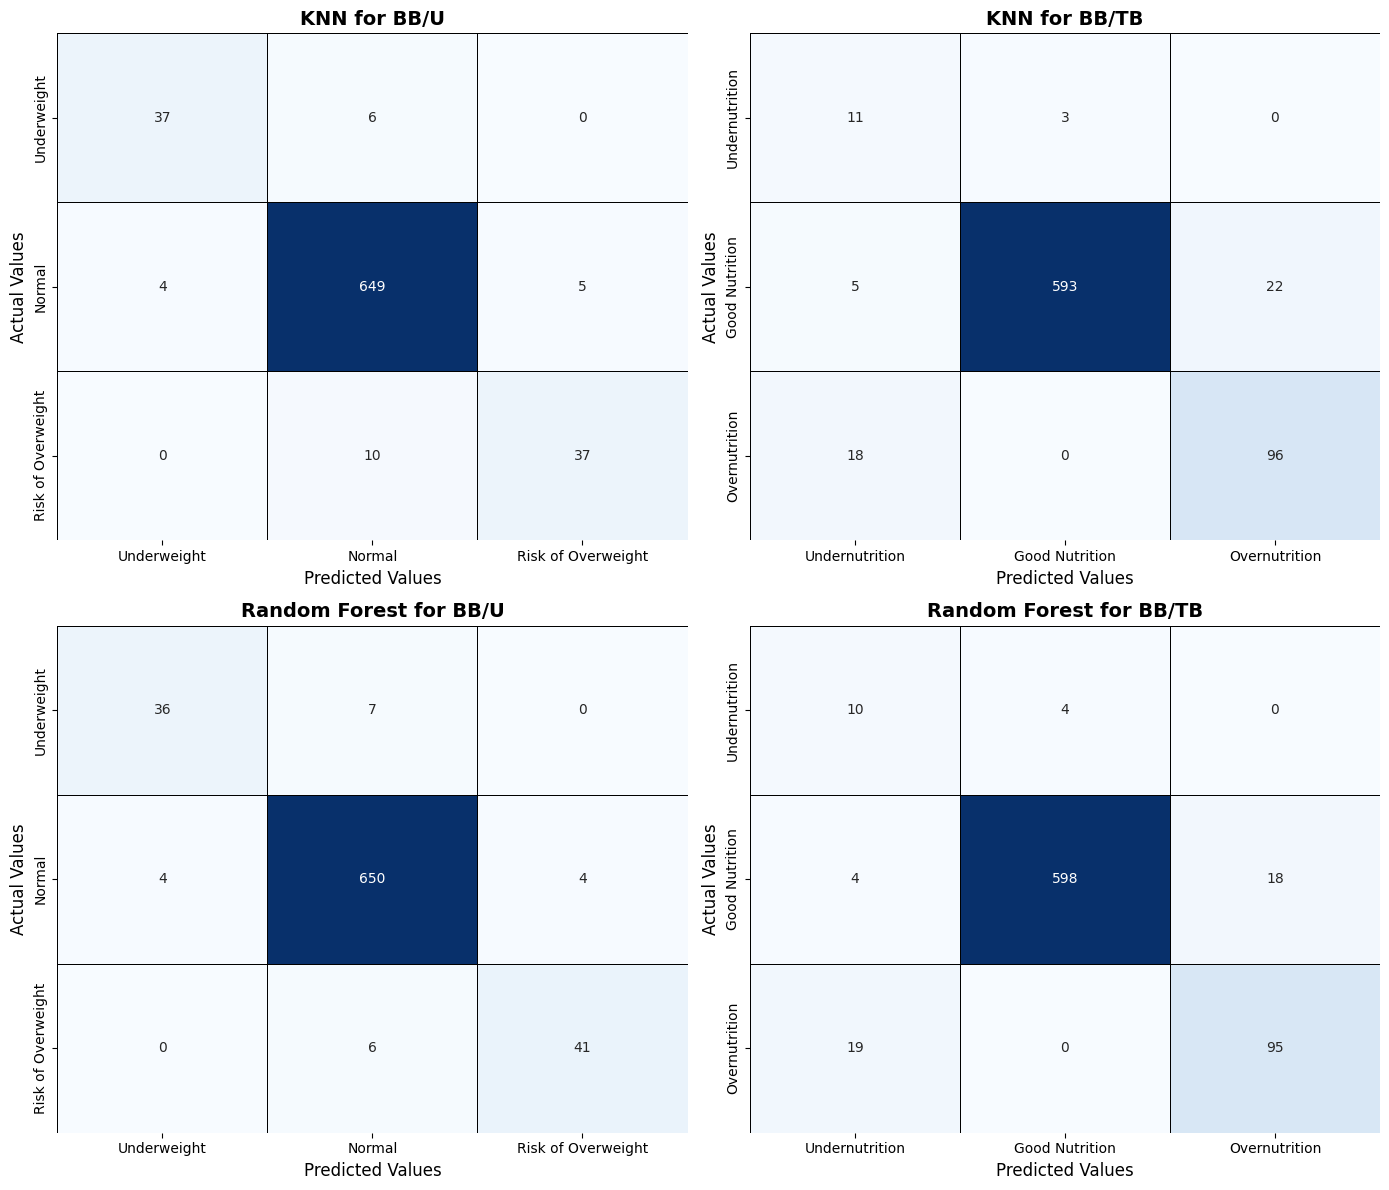

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for confusion matrices
confusion_matrices = {
    'KNN for BB/U': np.array([[37, 6, 0],
                                              [4, 649, 5],
                                              [0, 10, 37]]),
    'KNN for BB/TB': np.array([[11, 3, 0],
                                               [5, 593, 22],
                                               [18, 0, 96]]),
    'Random Forest for BB/U': np.array([[36, 7, 0],
                                        [4, 650, 4],
                                        [0, 6, 41]]),
    'Random Forest for BB/TB': np.array([[10, 4, 0],
                                         [4, 598, 18],
                                         [19, 0, 95]])
}

# Corrected class labels for the matrices in English
labels_bb_u = ['Underweight', 'Normal', 'Risk of Overweight']
labels_bb_tb = ['Undernutrition', 'Good Nutrition', 'Overnutrition']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (title, cm) in enumerate(confusion_matrices.items()):
    if 'BB/U' in title:
        labels = labels_bb_u
    else:
        labels = labels_bb_tb
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=labels, yticklabels=labels,
                cbar=False, linewidths=0.5, linecolor='black')
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Predicted Values', fontsize=12)
    axes[i].set_ylabel('Actual Values', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

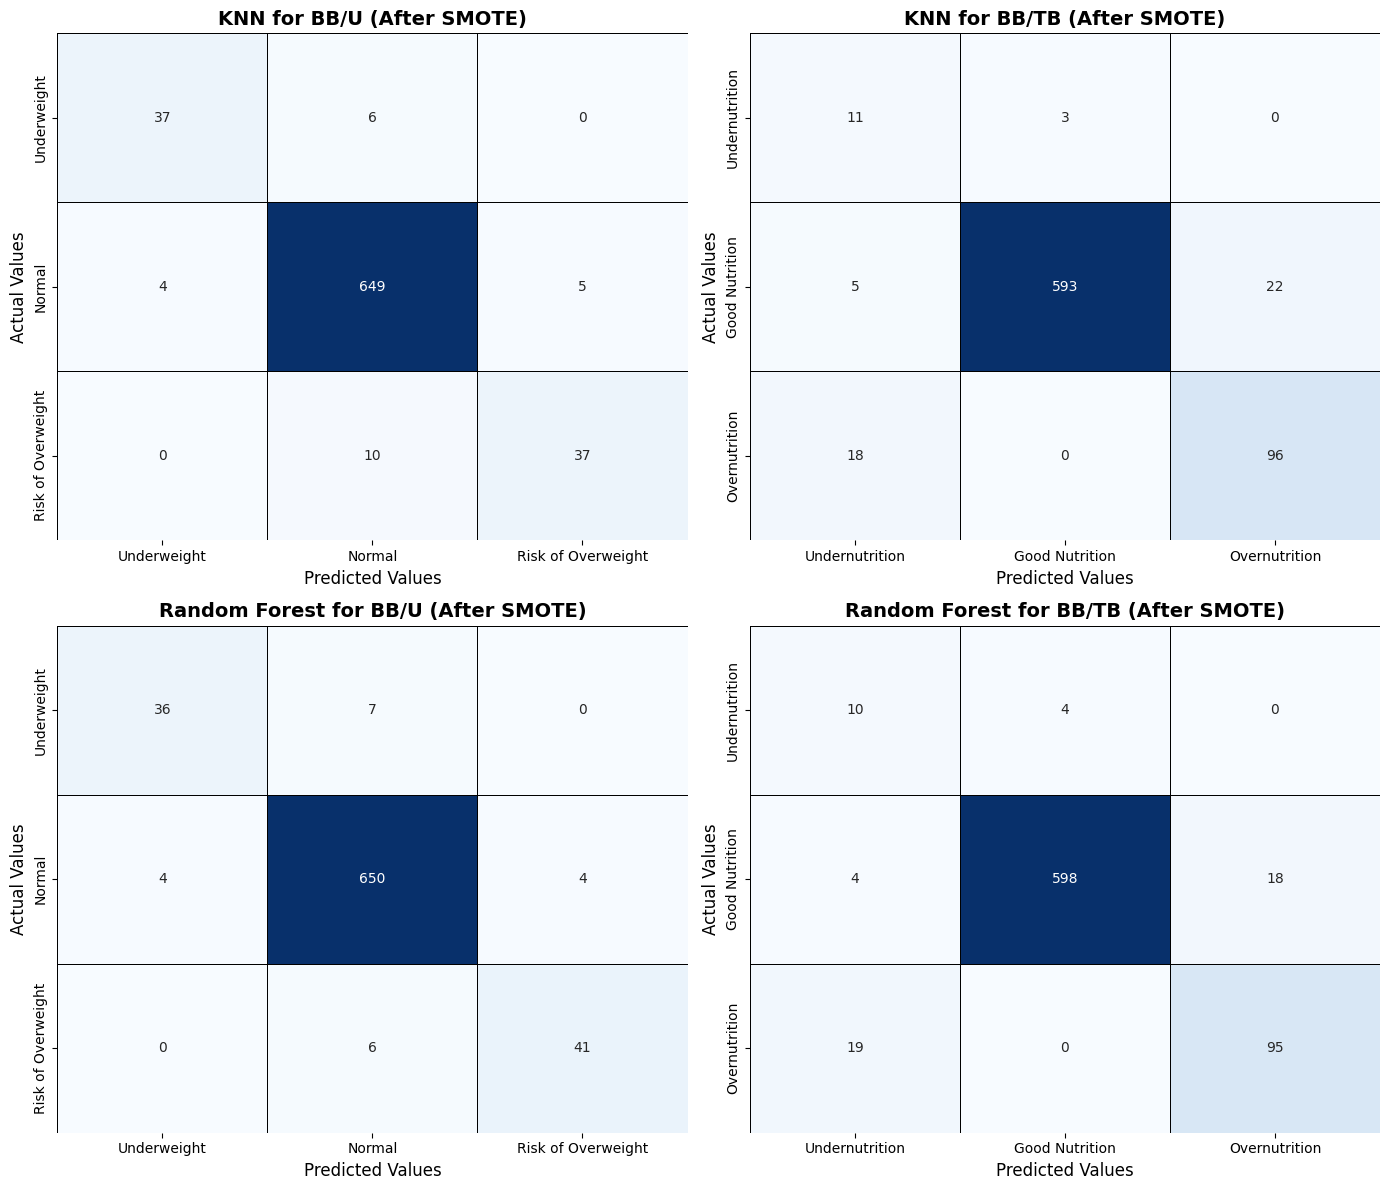

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data for confusion matrices (after SMOTE)
confusion_matrices_smote = {
    'KNN for BB/U (After SMOTE)': np.array([[37, 6, 0],
                                            [4, 649, 5],
                                            [0, 10, 37]]),
    'KNN for BB/TB (After SMOTE)': np.array([[11, 3, 0],
                                             [5, 593, 22],
                                             [18, 0, 96]]),
    'Random Forest for BB/U (After SMOTE)': np.array([[36, 7, 0],
                                                      [4, 650, 4],
                                                      [0, 6, 41]]),
    'Random Forest for BB/TB (After SMOTE)': np.array([[10, 4, 0],
                                                       [4, 598, 18],
                                                       [19, 0, 95]])
}

# Corrected class labels for the matrices in English
labels_bb_u = ['Underweight', 'Normal', 'Risk of Overweight']
labels_bb_tb = ['Undernutrition', 'Good Nutrition', 'Overnutrition']

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for i, (title, cm) in enumerate(confusion_matrices_smote.items()):
    if 'BB/U' in title:
        labels = labels_bb_u
    else:
        labels = labels_bb_tb
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i],
                xticklabels=labels, yticklabels=labels,
                cbar=False, linewidths=0.5, linecolor='black')
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Predicted Values', fontsize=12)
    axes[i].set_ylabel('Actual Values', fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()